<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Project & Dataset Overview</div>
    <center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/8/8c/Mouse_brain.jpg" width="400" style="margin-top: 20px;">
</center>

Visium HD 3' Gene Expression Library, Mouse Brain (Fresh Frozen)

In [25]:
# Install Seurat and dependencies
if (!requireNamespace("remotes", quietly = TRUE)) {
  install.packages("remotes")
}

# Install Seurat (includes SCTransform)
if (!requireNamespace("Seurat", quietly = TRUE)) {
  install.packages("Seurat", dependencies = TRUE)
}

# Verify installations
library(Seurat)
packageVersion("Seurat")

[1] '5.4.0'

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Library Load </div>
    <center>
  

In [1]:
library(Seurat)
library(future)
library(ggplot2)
options(future.globals.maxSize = 1000 * 1024^2)

Warning message:
"package 'Seurat' was built under R version 4.4.3"
Loading required package: SeuratObject

Warning message:
"package 'SeuratObject' was built under R version 4.4.3"
Loading required package: sp


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t


Warning message:
"package 'future' was built under R version 4.4.3"
Warning message:
"package 'ggplot2' was built under R version 4.4.3"


<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Load data </div>
    <center>

In [13]:
# Check the path exists
path <- "/Users/freddymappin/Desktop/ST_1/xenium_tiny_subset"
if (!dir.exists(path)) {
  stop(sprintf("Data path does not exist: %s", path))
}

# Load the Xenium data WITH segmentation boundaries
xenium.obj <- LoadXenium(path, fov = "fov", 
                         segmentations = "cell")

# Remove cells with 0 counts
xenium.obj <- subset(xenium.obj, subset = nCount_Xenium > 0)

# Check object
print(xenium.obj)

Cell_seg columns: cell_id

Adding default segmentation_method = 'cell'

Genome matrix has multiple modalities, returning a list of matrices for this genome

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Not validating FOV objects"
Warning message:
"Not validating Centroids objects"
Warning message:
"Not validating Centroids objects"
Warning message:
"Not validating FOV objects"
Warning message:
"Not validating Centroids objects"
Warning message:
"Not validating FOV object

An object of class Seurat 
541 features across 36553 samples within 4 assays 
Active assay: Xenium (248 features, 0 variable features)
 1 layer present: counts
 3 other assays present: BlankCodeword, ControlCodeword, ControlProbe
 1 spatial field of view present: fov


<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Quality control </div>
    <center>

Warning message:
"Default search for "data" layer in "Xenium" assay yielded no results; utilizing "counts" layer instead."


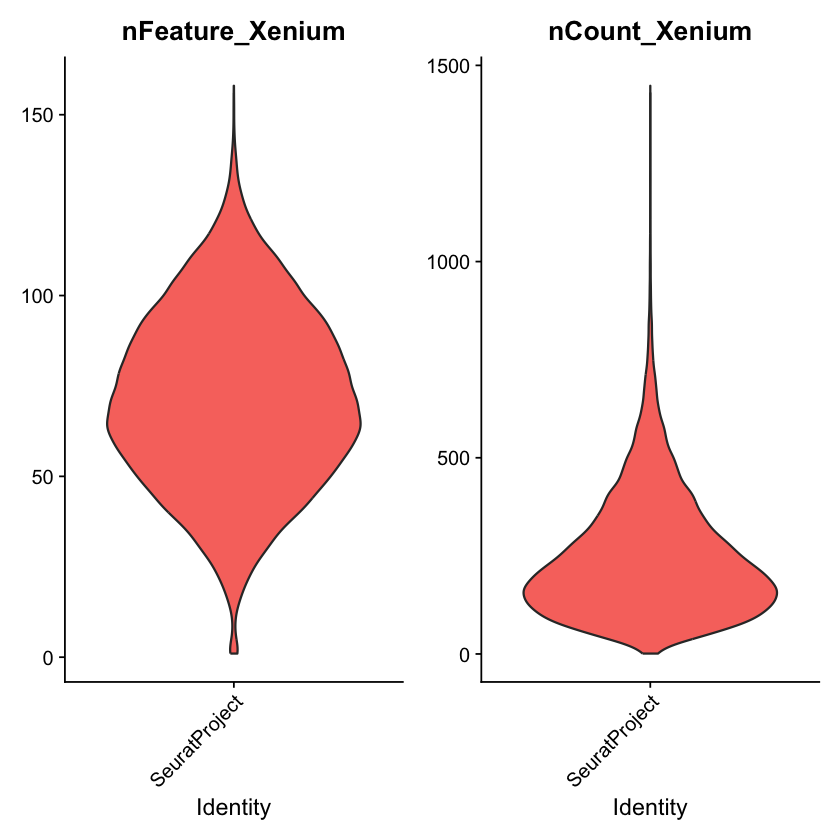

In [3]:
VlnPlot(xenium.obj, features = c("nFeature_Xenium", "nCount_Xenium"), ncol = 2, pt.size = 0)

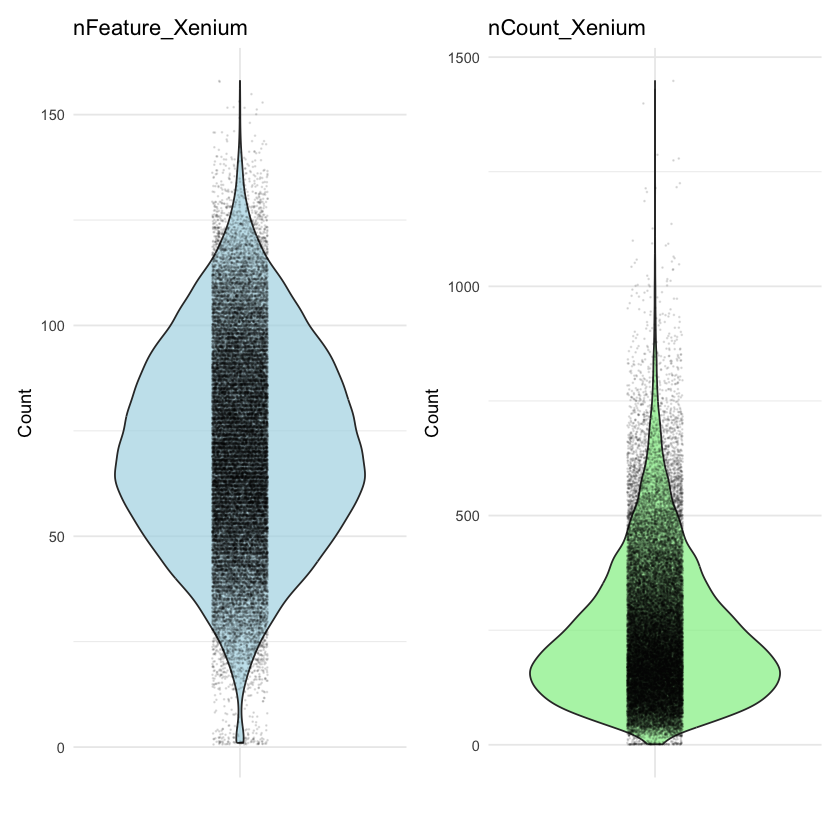

In [4]:
# Create violin plots using ggplot2 (patchwork already loaded by Seurat)
# Prepare data
qc_data <- data.frame(
  nFeature = xenium.obj$nFeature_Xenium,
  nCount = xenium.obj$nCount_Xenium
)

# Create violin plots
p1 <- ggplot(qc_data, aes(x = "", y = nFeature)) +
  geom_violin(fill = "lightblue", alpha = 0.7) +
  geom_jitter(width = 0.1, size = 0.1, alpha = 0.1) +
  labs(title = "nFeature_Xenium", x = "", y = "Count") +
  theme_minimal()

p2 <- ggplot(qc_data, aes(x = "", y = nCount)) +
  geom_violin(fill = "lightgreen", alpha = 0.7) +
  geom_jitter(width = 0.1, size = 0.1, alpha = 0.1) +
  labs(title = "nCount_Xenium", x = "", y = "Count") +
  theme_minimal()

# Display side by side
p1 | p2

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Visualization</div>
    <center>
  

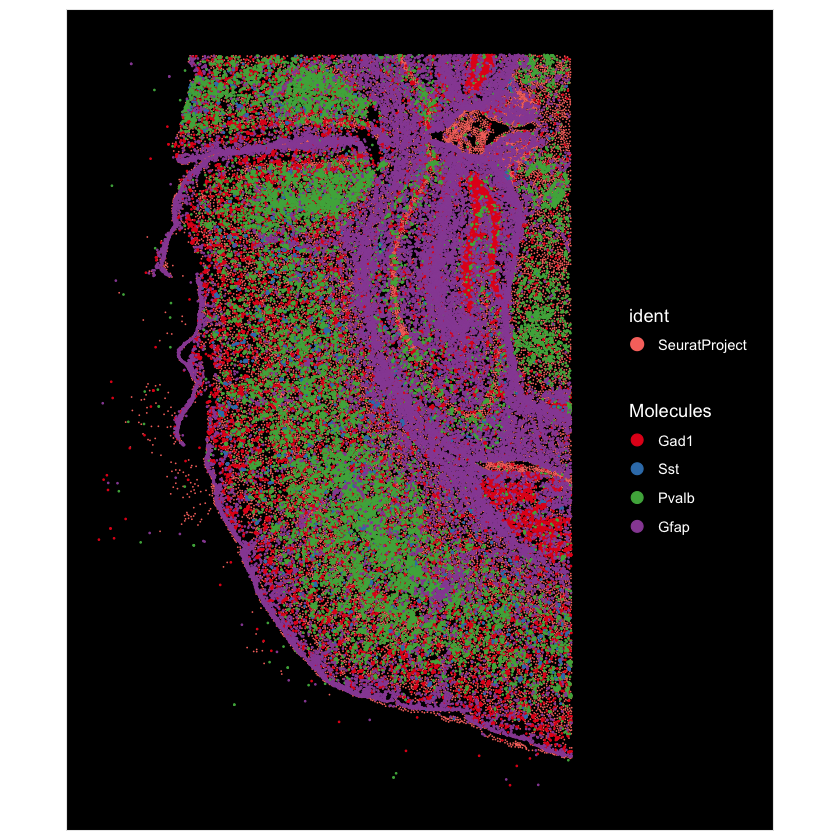

In [5]:
ImageDimPlot(xenium.obj, fov = "fov", molecules = c("Gad1", "Sst", "Pvalb", "Gfap"), nmols = 20000)

Warning message:
"No layers found matching search pattern provided"
Warning message in FetchData.Assay5(object = object[[DefaultAssay(object = object)]], :
"data layer is not found and counts layer is used"


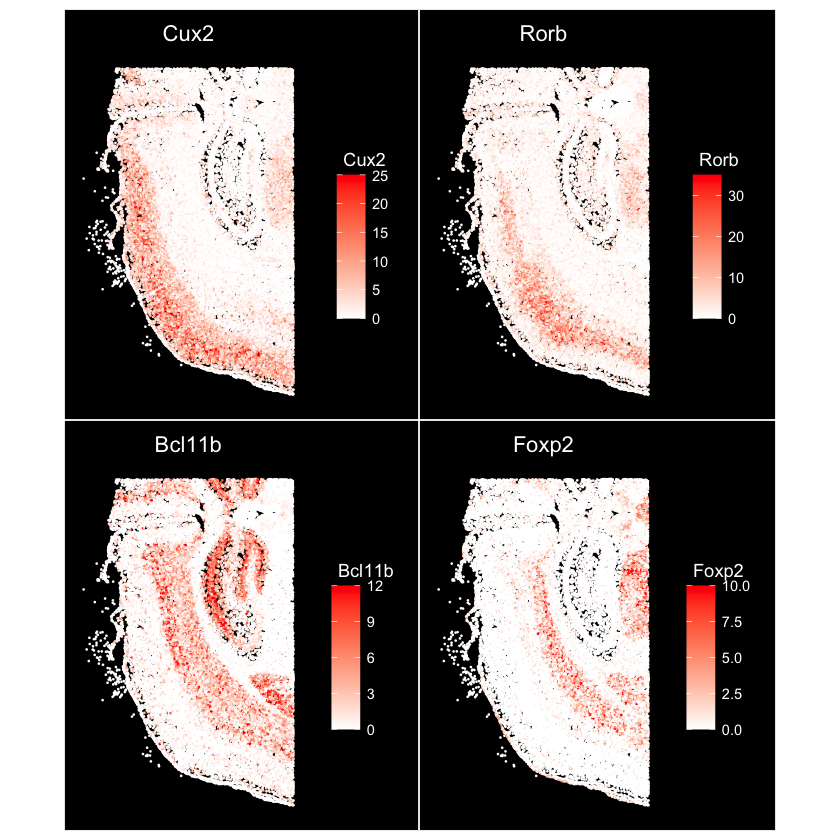

In [6]:
ImageFeaturePlot(xenium.obj, features = c("Cux2", "Rorb", "Bcl11b", "Foxp2"), max.cutoff = c(25,
    35, 12, 10), size = 0.75, cols = c("white", "red"))

Warning message:
"Key 'Xenium_' taken, using 'zoom_' instead"
Warning message:
"Adding image with unordered cells"


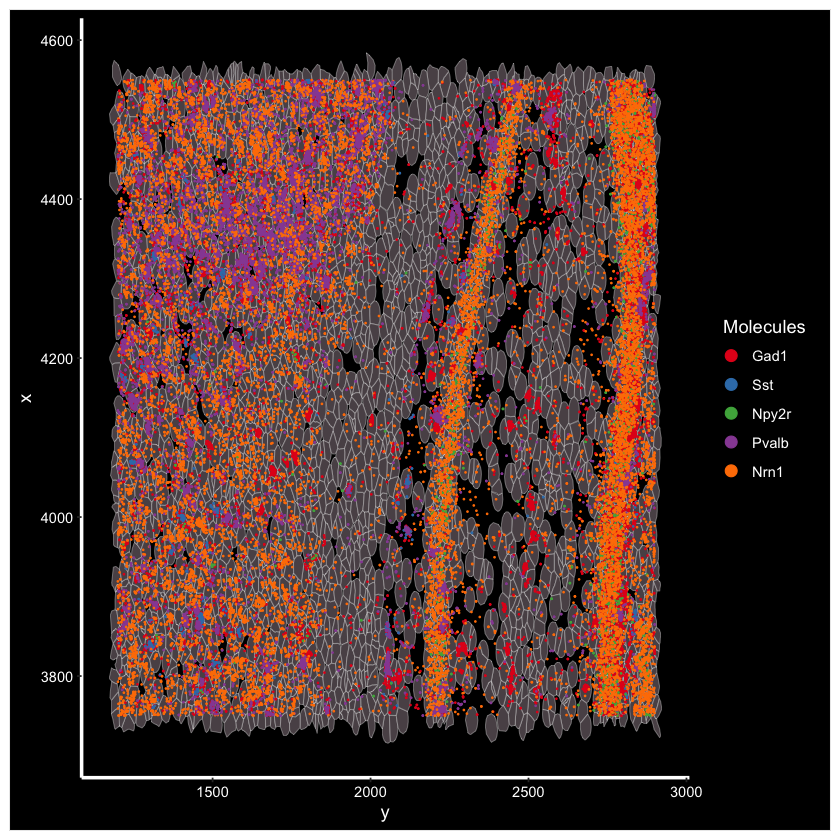

In [7]:
cropped.coords <- Crop(xenium.obj[["fov"]], x = c(1200, 2900), y = c(3750, 4550), coords = "plot")
xenium.obj[["zoom"]] <- cropped.coords
# visualize cropped area with cell segmentations & selected molecules
DefaultBoundary(xenium.obj[["zoom"]]) <- "segmentation"
ImageDimPlot(xenium.obj, fov = "zoom", axes = TRUE, border.color = "white", border.size = 0.1, cols = "polychrome",
    coord.fixed = FALSE, molecules = c("Gad1", "Sst", "Npy2r", "Pvalb", "Nrn1"), nmols = 10000)

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Dimensionality Reduction  &  Clustering</div>
    <center>
  

In [8]:
xenium.obj <- SCTransform(xenium.obj, assay = "Xenium")
xenium.obj <- RunPCA(xenium.obj, npcs = 30, features = rownames(xenium.obj))
xenium.obj <- RunUMAP(xenium.obj, dims = 1:30)
xenium.obj <- FindNeighbors(xenium.obj, reduction = "pca", dims = 1:30)
xenium.obj <- FindClusters(xenium.obj, resolution = 0.3)

Running SCTransform on assay: Xenium

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

`vst.flavor` is set to 'v2' but could not find glmGamPoi installed.
Please install the glmGamPoi package for much faster estimation.
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('glmGamPoi')
--------------------------------------------
Falling back to native (slower) implementation.


Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 248 by 36553

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 248 genes, 5000 cells

Second step: Get residuals using fitted parameters for 248 genes

Computing corrected count matrix for 248 genes

Calculating gene attributes

Wall clock passed: Time difference of 18.15477 secs

Determine variable features

Centering data matrix

Place corrected count matrix in counts slot

Set

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 36553
Number of edges: 1341087

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9582
Number of communities: 27
Elapsed time: 3 seconds


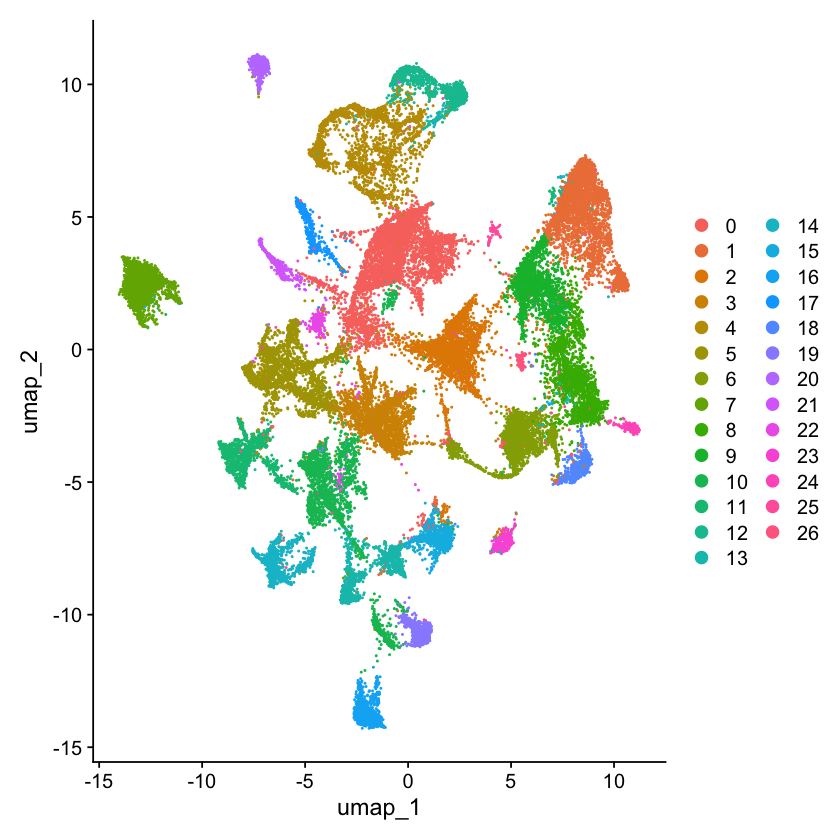

In [9]:
DimPlot(xenium.obj)

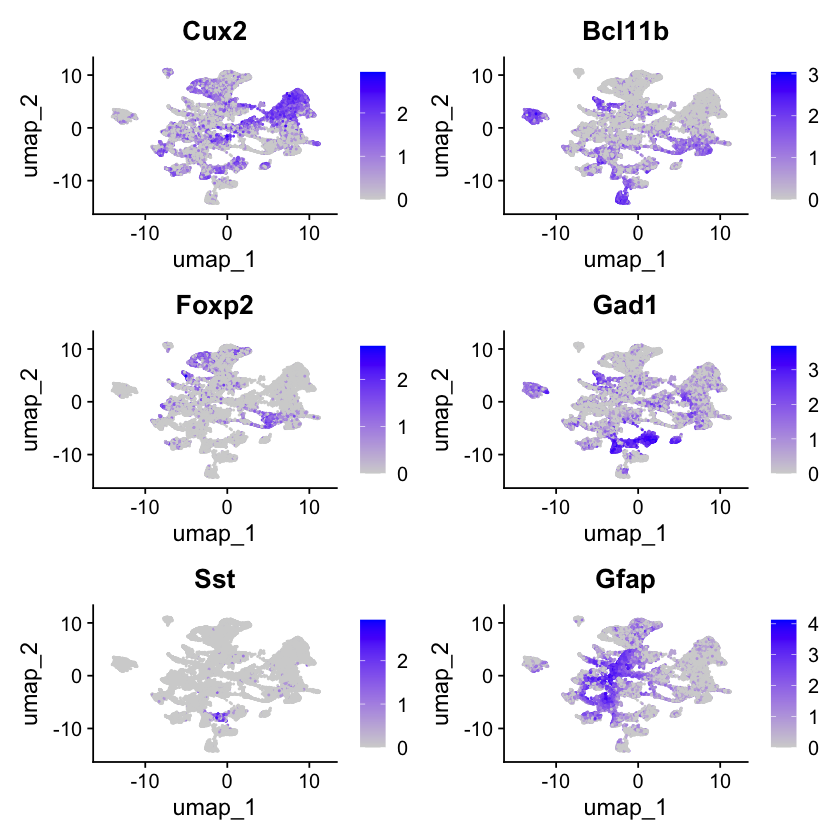

In [10]:
FeaturePlot(xenium.obj, features = c("Cux2", "Bcl11b", "Foxp2", "Gad1", "Sst", "Gfap"))

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Cluster Overlay</div>
    <center>

Warning message:
"No FOV associated with assay 'SCT', using global default FOV"


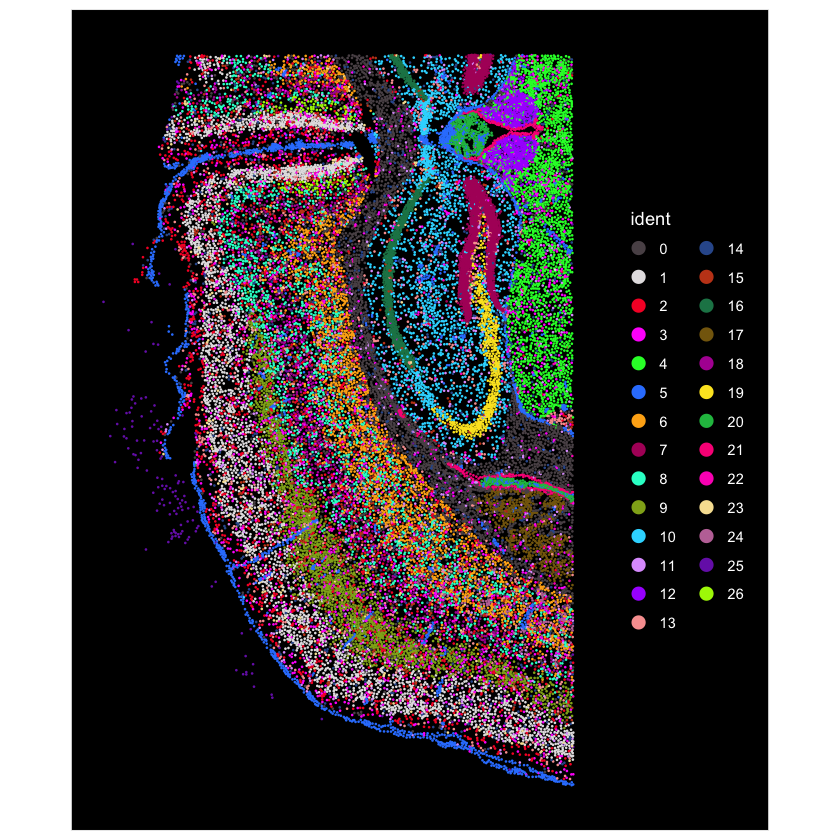

In [11]:
ImageDimPlot(xenium.obj, cols = "polychrome", size = 0.75)

Warning message:
"No layers found matching search pattern provided"
Warning message in FetchData.Assay5(object = object[[DefaultAssay(object = object)]], :
"data layer is not found and counts layer is used"


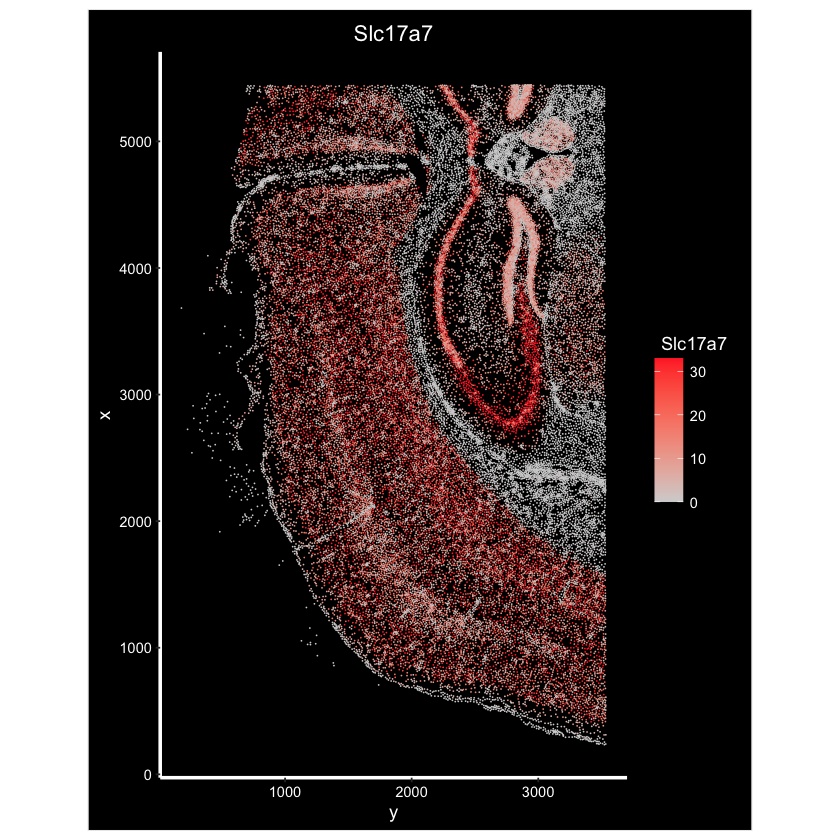

In [14]:
p1 <- ImageFeaturePlot(xenium.obj, features = "Slc17a7", axes = TRUE, max.cutoff = "q90")
p1

Warning message:
"Key 'Xenium_' taken, using 'crop_' instead"
Warning message:
"No layers found matching search pattern provided"
Warning message in FetchData.Assay5(object = object[[DefaultAssay(object = object)]], :
"data layer is not found and counts layer is used"


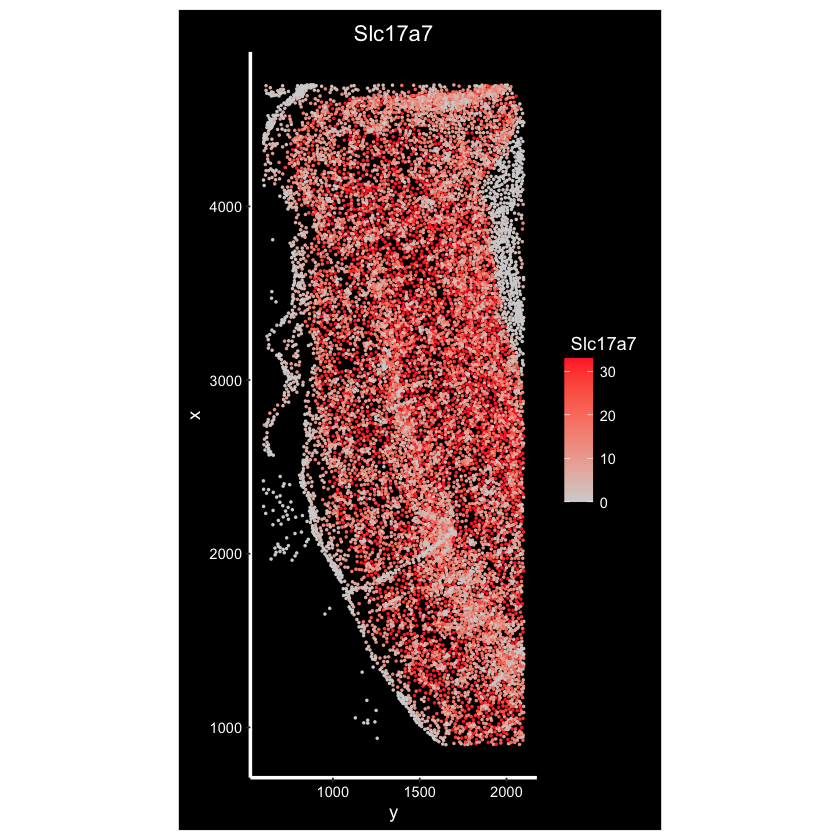

In [15]:
crop <- Crop(xenium.obj[["fov"]], x = c(600, 2100), y = c(900, 4700))
xenium.obj[["crop"]] <- crop
p2 <- ImageFeaturePlot(xenium.obj, fov = "crop", features = "Slc17a7", size = 1, axes = TRUE, max.cutoff = "q90")
p2